In [ ]:
import torch

# Zadání
- Vytvořte tensor se shapem (1,2,3,3), vyplněn číslami od 1 do 18, s datovým typem float64 a device = cuda
- Vypište z tohoto tensoru čísla (a) [4,5,6] (b) 18 (bonus) [1,4,7],[10,13,16] - vytvořte jen pomocí indexu, bez array, bez loopu
- vytvořte ten samý tensor (s random čísly), pomocí funkce torch.rand
- vytvořte tensor shape([90]) od 1 do 10 pomocí torch.range step = 0.1
- Zjistěte hodnoty z prvního tensoru x ( min, max, mean(avg), sum, argmax, argmin)
- vyzkoušejte si jak fungujou funkce (squeeze, unsqueeze, permute)


```
# Funkce k použití
- torch.tensor()
- torch.shape # zobrazí shape
- tensor[index]
- torch.rand()
- torch.arange()
- tensor.min(), tensor.max(), tensor.mean(), tensor.sum(), tensor.argmax(), tensor.argmin()
- tensor.squeeze(), tensor.unsqueeze(), tensor.permute()
```
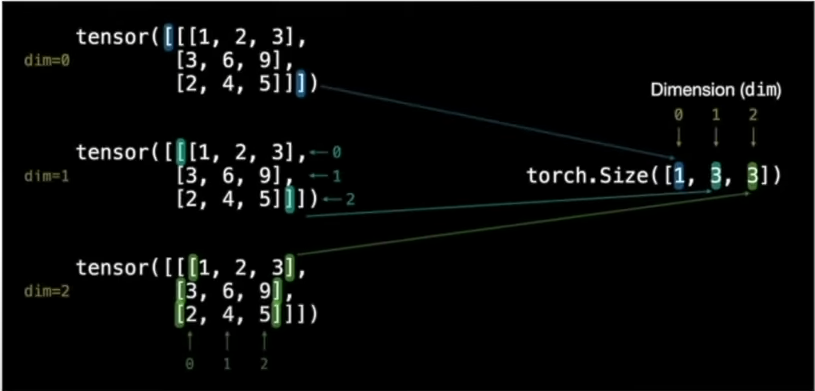


In [ ]:
!nvidia-smi

Tue Oct 17 13:26:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Správná Řešení

In [ ]:
import torch
# 1. create tensor

x = torch.tensor([[[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[10,11,12],
                   [13,14,15],
                   [16,17,18]]]], dtype = torch.float64, device = "cuda")

x.shape, x.dtype, x

(torch.Size([1, 2, 3, 3]),
 torch.float64,
 tensor([[[[ 1.,  2.,  3.],
           [ 4.,  5.,  6.],
           [ 7.,  8.,  9.]],
 
          [[10., 11., 12.],
           [13., 14., 15.],
           [16., 17., 18.]]]], device='cuda:0', dtype=torch.float64))

In [ ]:
# 2. write just list of [4,5,6] and just 4
# 3. Bonus: list of [1,4,7],[10,13,16]

x[0,0,1], x[0,1,2,2], x[:,:,:,0]

(tensor([4., 5., 6.], device='cuda:0', dtype=torch.float64),
 tensor(18., device='cuda:0', dtype=torch.float64),
 tensor([[[ 1.,  4.,  7.],
          [10., 13., 16.]]], device='cuda:0', dtype=torch.float64))

In [ ]:
#data types

scalar = torch.tensor([1], dtype=torch.float32)

scalar.item() # get tensor back to python

1.0

In [ ]:
# create a random tensor

rand_x = torch.rand(1,2,3,3)
rand_x.shape, rand_x

(torch.Size([1, 2, 3, 3]),
 tensor([[[[0.3099, 0.2183, 0.2053],
           [0.1451, 0.3415, 0.8054],
           [0.1764, 0.6164, 0.4044]],
 
          [[0.2524, 0.5143, 0.3032],
           [0.7628, 0.9990, 0.4374],
           [0.0620, 0.4212, 0.3949]]]]))

In [ ]:
# create tensor in range

rang_x = torch.arange(0,10)
rang_y = torch.arange(1,10, step = 0.1)

rang_x, rang_y.shape

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.Size([90]))

In [ ]:
# Device
import os

device = "cuda" if torch.cuda.is_available() else "cpu"


device

'cuda'

In [ ]:
!nvidia-smi

Tue Oct 17 13:26:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W /  70W |    121MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# tensor min, max, mean(avg), sum, argmax, argmin

x.max(), x.min(), x.mean(dtype = torch.float64), x.sum(), x.argmax(), x.argmin()

(tensor(18., device='cuda:0', dtype=torch.float64),
 tensor(1., device='cuda:0', dtype=torch.float64),
 tensor(9.5000, device='cuda:0', dtype=torch.float64),
 tensor(171., device='cuda:0', dtype=torch.float64),
 tensor(17, device='cuda:0'),
 tensor(0, device='cuda:0'))

In [ ]:
# squeeze, unsqueeze, permute

x.squeeze(0).shape, x.unsqueeze(2).shape, x.permute(3,2,1,0).shape

(torch.Size([2, 3, 3]), torch.Size([1, 2, 1, 3, 3]), torch.Size([3, 3, 2, 1]))